# Predicting Number of Upvotes on Question 

An online question and answer platform has hired us to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. 

In [39]:
## Importing all required libraries...
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics

from collections import Counter

pd.options.display.max_rows = None
pd.options.display.max_columns = None

## About Data:
- **ID:** Question ID
- **Tag:** Anonymised tags representing question category
- **Reputation:** Reputation score of question author
- **Answers:** Number of times question has been answered
- **Username:** Anonymised user id of question author
- **Views:** Number of times question has been viewed
- **Upvotes:** Number of upvotes for the question

In [2]:
## Reading Training data...
data_train = pd.read_csv('train_NIR5Yl1.csv')
data_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [3]:
print("Dimensions of Train Data is :" , data_train.shape)

Dimensions of Train Data is : (330045, 7)


In [4]:
## Reading Test data...
data_test = pd.read_csv('test_8i3B3FC.csv')
data_test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [5]:
print("Dimensions of Test Data is :" , data_test.shape)

Dimensions of Test Data is : (141448, 6)


In [6]:
## Creating feature 'Upvotes' with random value '999999'....
data_test['Upvotes'] = 999999

In [7]:
## Merging Train and Test Data....
df = data_train.append(data_test)

df.reset_index(drop = True , inplace = True)

In [8]:
df.index

RangeIndex(start=0, stop=471493, step=1)

In [9]:
print("Dimensions of Merged Data 'df' is :" , df.shape)

Dimensions of Merged Data 'df' is : (471493, 7)


# Exploratory Data Analysis:

### Question Tag:

In [10]:
## We'll be doinf the explorartory data analysis of Training data only...
train = data_train.copy()

<AxesSubplot:xlabel='Tag', ylabel='count'>

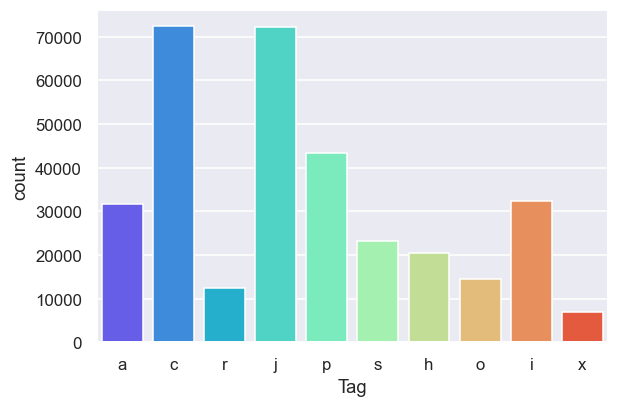

In [11]:
plt.figure(dpi = 110)
sns.countplot(x = train['Tag'] , palette = 'rainbow')

Text(0, 0.5, 'Total Number of Views')

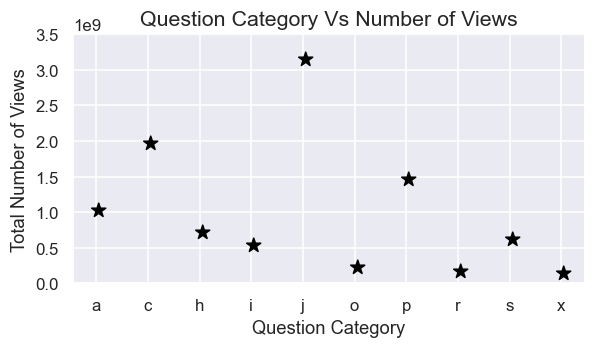

In [12]:
plt.figure(dpi = 110 , figsize = (6,3))
plt.scatter(y= train.groupby(['Tag']).Views.sum() , x = train.groupby(['Tag']).Views.sum().index , 
            c = "black", alpha = 1, marker=r'$\star$' , s= 150)
plt.ylim(0 , 3500000000)
plt.title("Question Category Vs Number of Views" , fontsize = 14)
plt.xlabel('Question Category' , fontsize = 12)
plt.ylabel('Total Number of Views' , fontsize = 12)

Text(0, 0.5, 'Total Number of Times Answered')

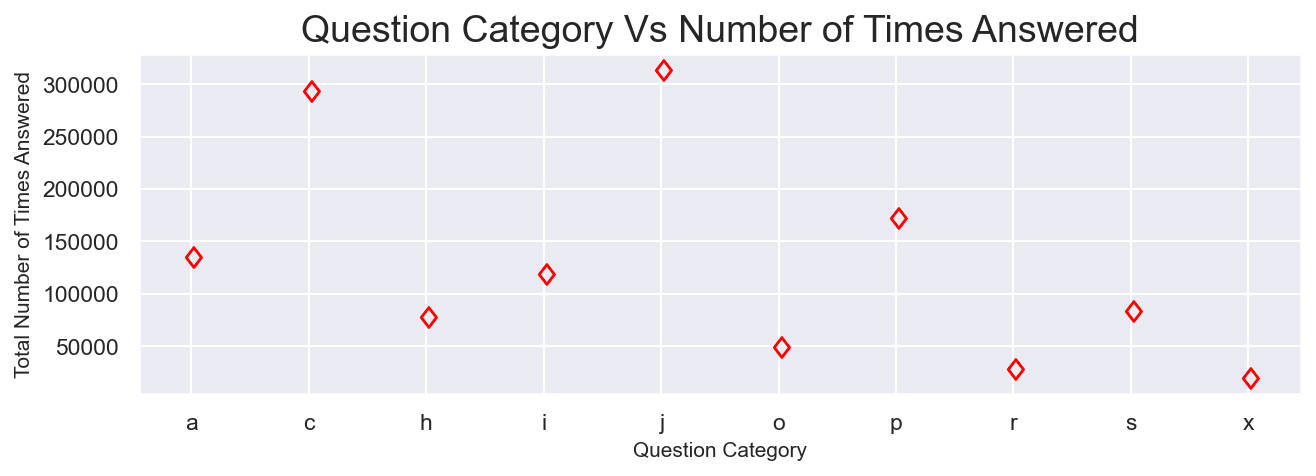

In [13]:
plt.figure(dpi = 150 , figsize = (10,3))
plt.scatter(y = train.groupby(['Tag']).Answers.sum() , x = train.groupby(['Tag']).Answers.sum().index , 
            c = "red", alpha = 1, marker=r'$\diamondsuit$' , s= 100)
plt.title("Question Category Vs Number of Times Answered" , fontsize = 18)
plt.xlabel('Question Category' , fontsize = 10)
plt.ylabel('Total Number of Times Answered' , fontsize = 10)

##### Some key take aways:
- The top two most occuring category of questions are - "**c**" and "**j**".
- The most least occuring question category is "**x**".
- Questions of **j** category is one of the **most viewed category** out of all.
- Even though both "**c**" and "**j**" occured almost similar no. of time, but "**j**" category question is the one with more **views**.

### Reputation score of question author:

In [14]:
print("Maximum Reputation Score is :" , train['Reputation'].max())
print("Minimum Reputation Score is :" , train['Reputation'].min())
print("Median of Reputation Score is :" , train['Reputation'].median())

Maximum Reputation Score is : 1042428.0
Minimum Reputation Score is : 0.0
Median of Reputation Score is : 1236.0


Text(0, 0.5, 'Count')

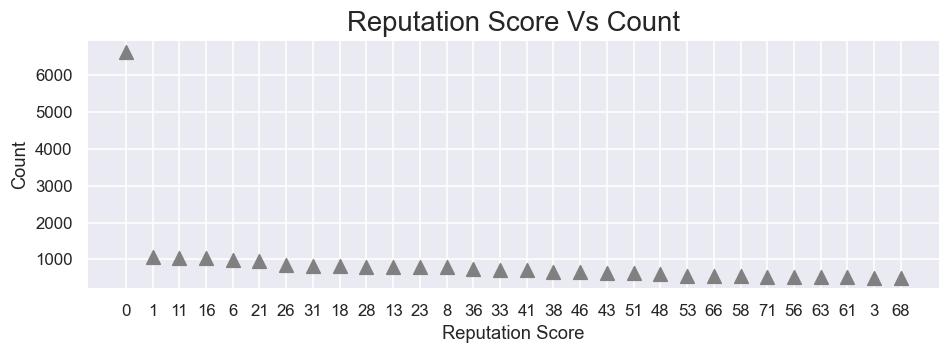

In [15]:
plt.figure(dpi = 110 , figsize = (10,3))
plt.scatter(x = train['Reputation'].value_counts().sort_values(ascending = False).head(30).index.astype('int64').astype('str') 
            , y = train['Reputation'].value_counts().sort_values(ascending = False).head(30) , c = "grey", alpha = 1,
            marker='^' , s= 80)
plt.title("Reputation Score Vs Count" , fontsize = 18)
plt.xlabel("Reputation Score" , fontsize = 12)
plt.ylabel("Count" , fontsize = 12)

### Authors:

Text(0.5, 0, 'No. of Questions Asked')

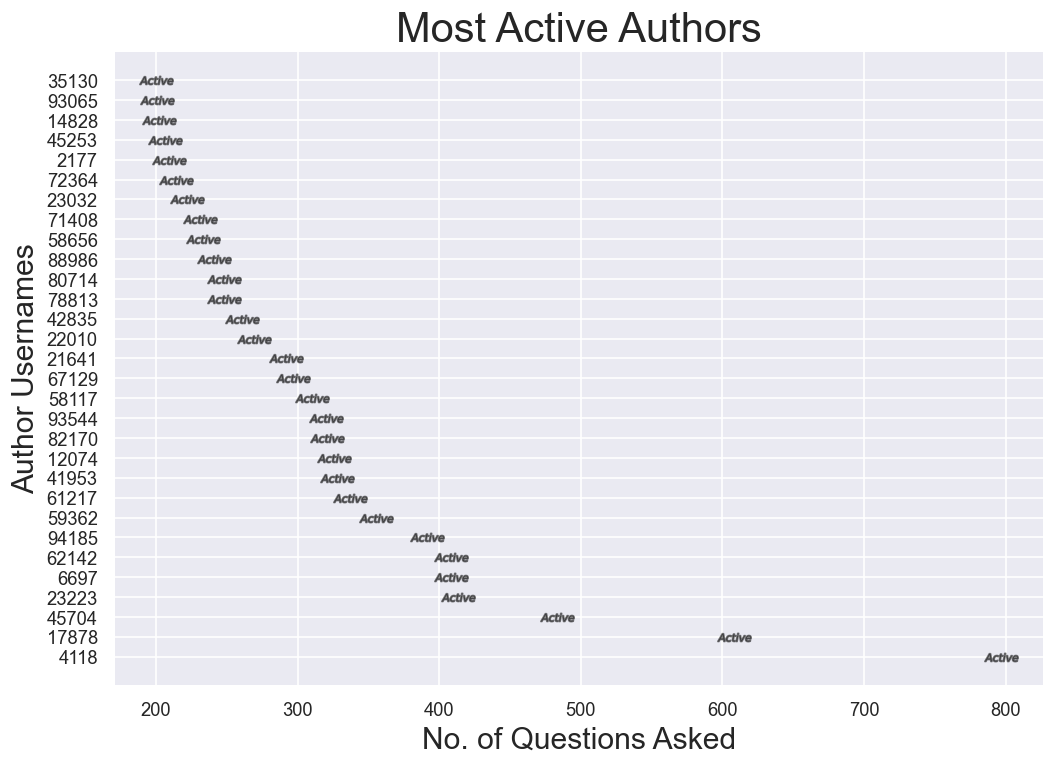

In [16]:
## Finding all active authors with more than 200 questions asked....
most_active_authors = 0
for i in range(len(train.Username.value_counts().values)):
    if train.Username.value_counts().values[i] < 200:
        most_active_authors = i
        break

plt.figure(dpi = 120 , figsize = (10,7))        
plt.scatter(x = train.Username.value_counts().head(most_active_authors) 
            , y = train.Username.value_counts().head(most_active_authors).index.astype('str') , c = "black", alpha = 0.5,
            marker="$Active$" , s= 400 )
plt.title("Most Active Authors" , fontsize = 25)
plt.ylabel("Author Usernames" , fontsize = 18)
plt.xlabel("No. of Questions Asked" , fontsize = 18)

Text(0.5, 0, 'Reputation Score')

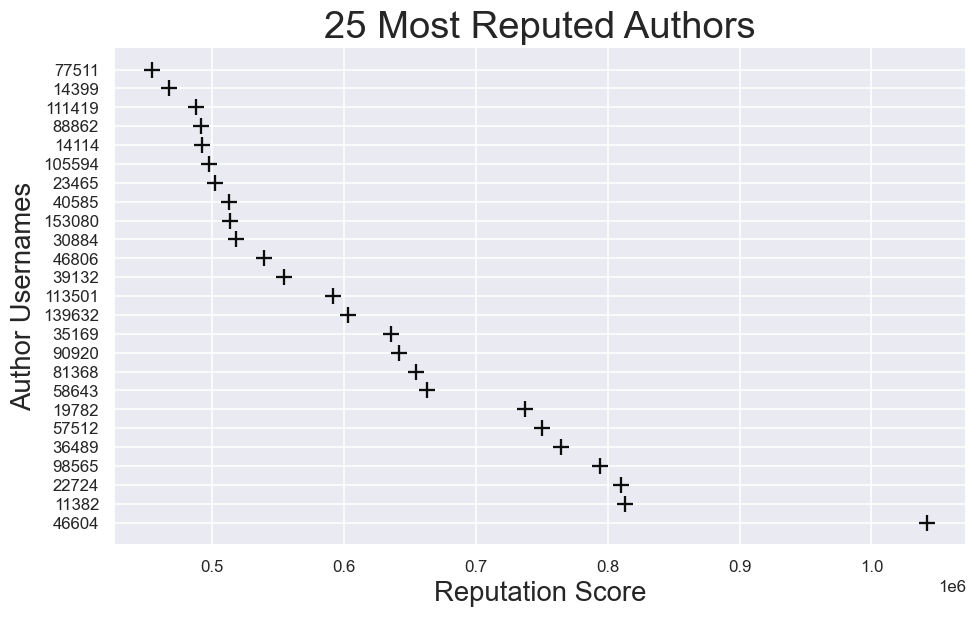

In [17]:
## Finding top 25 authors with highest Reputation Score....
plt.figure(dpi = 110 , figsize = (10,6))        
plt.scatter(x = train.groupby(['Username']).Reputation.mean().sort_values(ascending = False).head(25) 
            , y = train.groupby(['Username']).Reputation.mean().sort_values(ascending = False).head(25).index.astype('str') 
            , c = "black", alpha = 0.95 , marker="+" , s= 100 )

plt.title("25 Most Reputed Authors" , fontsize = 25)
plt.ylabel("Author Usernames" , fontsize = 18)
plt.xlabel("Reputation Score" , fontsize = 18)

Text(0.5, 0, 'Total Number of Views')

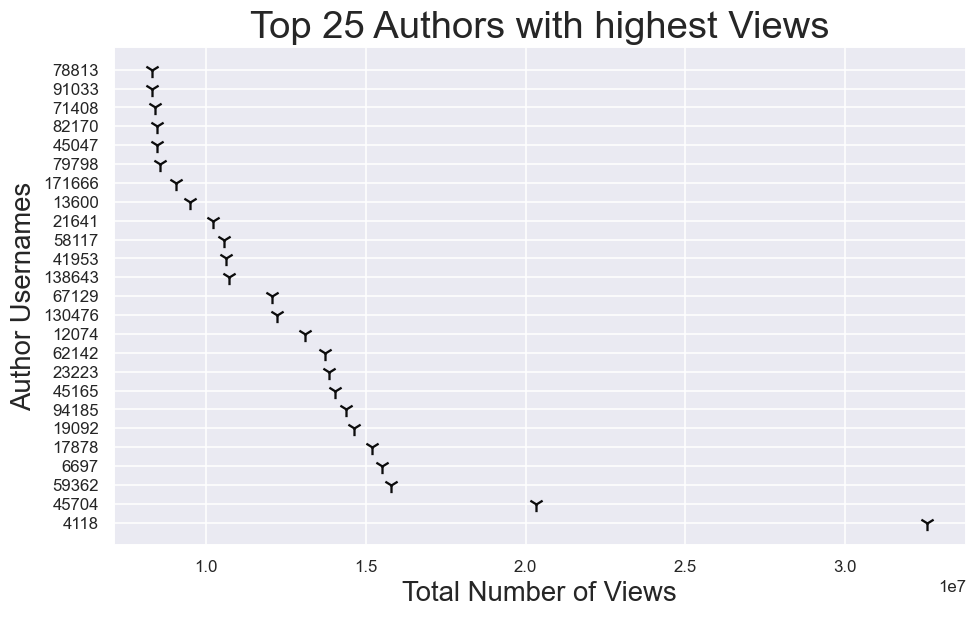

In [18]:
## Finding top 25 authors with highest Views....
plt.figure(dpi = 110 , figsize = (10,6))        
plt.scatter(x = train.groupby(['Username']).Views.sum().sort_values(ascending = False).head(25) 
            , y = train.groupby(['Username']).Views.sum().sort_values(ascending = False).head(25).index.astype('str') 
            , c = "black", alpha = 0.95 , marker="1" , s= 100 )

plt.title("Top 25 Authors with highest Views" , fontsize = 25)
plt.ylabel("Author Usernames" , fontsize = 18)
plt.xlabel("Total Number of Views" , fontsize = 18)

### Features Correlation:

<AxesSubplot:>

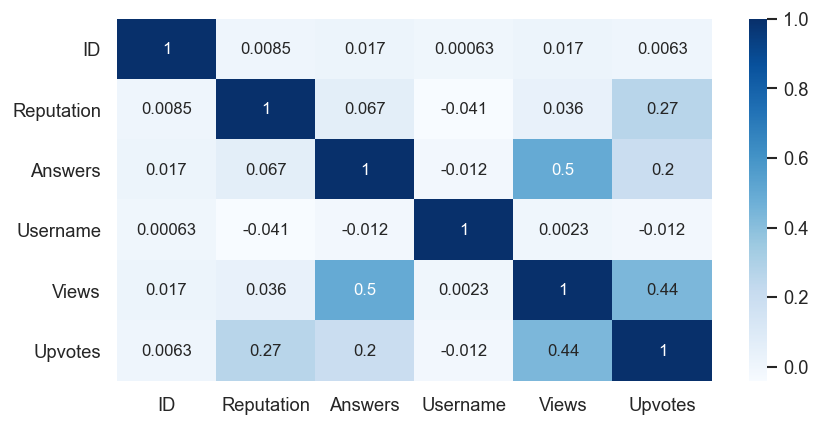

In [19]:
## Creating correlation matrix for train features....
plt.figure(dpi = 120 , figsize = (8,4))
sns.heatmap(train.corr() , annot = True , cmap="Blues")

- The **most highly correlated feature** to our target feature (Upvotes) is **"Views"**.

# Feature Engineering:

In [20]:
## Converting "Tag" and "Username" to type object...
## Later we'll use them as categorical features....
df['Username'] = df['Username'].astype('object')
df['Tag'] = df['Tag'].astype('object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          471493 non-null  int64  
 1   Tag         471493 non-null  object 
 2   Reputation  471493 non-null  float64
 3   Answers     471493 non-null  float64
 4   Username    471493 non-null  object 
 5   Views       471493 non-null  float64
 6   Upvotes     471493 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 25.2+ MB


In [22]:
## Finding all active authors with more than 100 questions asked....
active_authors = []   ## List of active authors....

for i in range(len(train.Username.value_counts().values)):
    if train.Username.value_counts().values[i] < 100:
        active_authors = train.Username.value_counts().head(i).index
        break

In [23]:
## Creating dummy for top Users only....
username_updated = []

for i in df['Username'].values:
    if i in active_authors:
        username_updated.append(i)
    else:
        username_updated.append('Non-Active')
        
## Adding the created list as new feature in the dataframe....
df['Username_updated'] = username_updated

In [24]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Username_updated
0,52664,a,3942.0,2.0,155623,7855.0,42.0,Non-Active
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,Non-Active
2,468453,c,1358.0,4.0,56177,8067.0,60.0,Non-Active
3,96996,a,264.0,3.0,168793,27064.0,9.0,Non-Active
4,131465,c,4271.0,4.0,112223,13986.0,83.0,Non-Active


In [25]:
## Creating dummies for "Tag" and "Username_updated" features....
cate = pd.get_dummies(df[['Tag' , 'Username_updated']] , drop_first = True)

In [26]:
cate.head()

,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Username_updated_2177,Username_updated_4118,Username_updated_5045,Username_updated_6697,Username_updated_7296,Username_updated_8082,Username_updated_12074,Username_updated_13835,Username_updated_14410,Username_updated_14828,Username_updated_17878,Username_updated_18424,Username_updated_21641,Username_updated_22010,Username_updated_23032,Username_updated_23223,Username_updated_29025,Username_updated_31884,Username_updated_35130,Username_updated_41238,Username_updated_41741,Username_updated_41953,Username_updated_42835,Username_updated_43332,Username_updated_43753,Username_updated_44764,Username_updated_45047,Username_updated_45253,Username_updated_45704,Username_updated_46113,Username_updated_46496,Username_updated_46730,Username_updated_47400,Username_updated_48395,Username_updated_50331,Username_updated_52274,Username_updated_55221,Username_updated_58117,Username_updated_58656,Username_updated_59362,Username_updated_59759,Username_updated_60159,Username_updated_61217,Username_updated_62142,Username_updated_67129,Username_updated_71242,Username_updated_71408,Username_updated_72364,Username_updated_72827,Username_updated_78139,Username_updated_78813,Username_updated_79015,Username_updated_79798,Username_updated_80714,Username_updated_82170,Username_updated_83660,Username_updated_85429,Username_updated_86353,Username_updated_88986,Username_updated_89235,Username_updated_90283,Username_updated_91033,Username_updated_93065,Username_updated_93544,Username_updated_94185,Username_updated_94708,Username_updated_104219,Username_updated_105412,Username_updated_111018,Username_updated_119203,Username_updated_130476,Username_updated_165704,Username_updated_Non-Active
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
## adding the new "cate" dataframe to main data frame "df".....
df = pd.concat([df , cate] , axis = 1)

In [28]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Username_updated,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Username_updated_2177,Username_updated_4118,Username_updated_5045,Username_updated_6697,Username_updated_7296,Username_updated_8082,Username_updated_12074,Username_updated_13835,Username_updated_14410,Username_updated_14828,Username_updated_17878,Username_updated_18424,Username_updated_21641,Username_updated_22010,Username_updated_23032,Username_updated_23223,Username_updated_29025,Username_updated_31884,Username_updated_35130,Username_updated_41238,Username_updated_41741,Username_updated_41953,Username_updated_42835,Username_updated_43332,Username_updated_43753,Username_updated_44764,Username_updated_45047,Username_updated_45253,Username_updated_45704,Username_updated_46113,Username_updated_46496,Username_updated_46730,Username_updated_47400,Username_updated_48395,Username_updated_50331,Username_updated_52274,Username_updated_55221,Username_updated_58117,Username_updated_58656,Username_updated_59362,Username_updated_59759,Username_updated_60159,Username_updated_61217,Username_updated_62142,Username_updated_67129,Username_updated_71242,Username_updated_71408,Username_updated_72364,Username_updated_72827,Username_updated_78139,Username_updated_78813,Username_updated_79015,Username_updated_79798,Username_updated_80714,Username_updated_82170,Username_updated_83660,Username_updated_85429,Username_updated_86353,Username_updated_88986,Username_updated_89235,Username_updated_90283,Username_updated_91033,Username_updated_93065,Username_updated_93544,Username_updated_94185,Username_updated_94708,Username_updated_104219,Username_updated_105412,Username_updated_111018,Username_updated_119203,Username_updated_130476,Username_updated_165704,Username_updated_Non-Active
0,52664,a,3942.0,2.0,155623,7855.0,42.0,Non-Active,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,Non-Active,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,468453,c,1358.0,4.0,56177,8067.0,60.0,Non-Active,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,96996,a,264.0,3.0,168793,27064.0,9.0,Non-Active,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,131465,c,4271.0,4.0,112223,13986.0,83.0,Non-Active,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
## Dropping unwanted features....
df1 = df.drop(['ID' , 'Tag' , 'Username' , 'Username_updated'] , axis = 1)

In [30]:
## Splitting into Training and Submission Data.....
Training = df1.iloc[:data_train.shape[0] , :]
Submission = df.iloc[data_train.shape[0]: , :]

In [31]:
df1.head()

,Reputation,Answers,Views,Upvotes,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Username_updated_2177,Username_updated_4118,Username_updated_5045,Username_updated_6697,Username_updated_7296,Username_updated_8082,Username_updated_12074,Username_updated_13835,Username_updated_14410,Username_updated_14828,Username_updated_17878,Username_updated_18424,Username_updated_21641,Username_updated_22010,Username_updated_23032,Username_updated_23223,Username_updated_29025,Username_updated_31884,Username_updated_35130,Username_updated_41238,Username_updated_41741,Username_updated_41953,Username_updated_42835,Username_updated_43332,Username_updated_43753,Username_updated_44764,Username_updated_45047,Username_updated_45253,Username_updated_45704,Username_updated_46113,Username_updated_46496,Username_updated_46730,Username_updated_47400,Username_updated_48395,Username_updated_50331,Username_updated_52274,Username_updated_55221,Username_updated_58117,Username_updated_58656,Username_updated_59362,Username_updated_59759,Username_updated_60159,Username_updated_61217,Username_updated_62142,Username_updated_67129,Username_updated_71242,Username_updated_71408,Username_updated_72364,Username_updated_72827,Username_updated_78139,Username_updated_78813,Username_updated_79015,Username_updated_79798,Username_updated_80714,Username_updated_82170,Username_updated_83660,Username_updated_85429,Username_updated_86353,Username_updated_88986,Username_updated_89235,Username_updated_90283,Username_updated_91033,Username_updated_93065,Username_updated_93544,Username_updated_94185,Username_updated_94708,Username_updated_104219,Username_updated_105412,Username_updated_111018,Username_updated_119203,Username_updated_130476,Username_updated_165704,Username_updated_Non-Active
0,3942.0,2.0,7855.0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,26046.0,12.0,55801.0,1175.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1358.0,4.0,8067.0,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,264.0,3.0,27064.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4271.0,4.0,13986.0,83.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Scaling the data:

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Training[['Reputation' , 'Answers' , 'Views']])

X_num = pd.DataFrame(data = scaler.transform(Training[['Reputation' , 'Answers' , 'Views']]) 
                     , columns = ['Reputation' , 'Answers' , 'Views'])

In [33]:
## Updating the data frame with scaled data....
Training = pd.concat([X_num , Training.drop(['Reputation' , 'Answers' , 'Views'] , axis = 1)]  , axis = 1)
Training.head()

,Reputation,Answers,Views,Upvotes,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Username_updated_2177,Username_updated_4118,Username_updated_5045,Username_updated_6697,Username_updated_7296,Username_updated_8082,Username_updated_12074,Username_updated_13835,Username_updated_14410,Username_updated_14828,Username_updated_17878,Username_updated_18424,Username_updated_21641,Username_updated_22010,Username_updated_23032,Username_updated_23223,Username_updated_29025,Username_updated_31884,Username_updated_35130,Username_updated_41238,Username_updated_41741,Username_updated_41953,Username_updated_42835,Username_updated_43332,Username_updated_43753,Username_updated_44764,Username_updated_45047,Username_updated_45253,Username_updated_45704,Username_updated_46113,Username_updated_46496,Username_updated_46730,Username_updated_47400,Username_updated_48395,Username_updated_50331,Username_updated_52274,Username_updated_55221,Username_updated_58117,Username_updated_58656,Username_updated_59362,Username_updated_59759,Username_updated_60159,Username_updated_61217,Username_updated_62142,Username_updated_67129,Username_updated_71242,Username_updated_71408,Username_updated_72364,Username_updated_72827,Username_updated_78139,Username_updated_78813,Username_updated_79015,Username_updated_79798,Username_updated_80714,Username_updated_82170,Username_updated_83660,Username_updated_85429,Username_updated_86353,Username_updated_88986,Username_updated_89235,Username_updated_90283,Username_updated_91033,Username_updated_93065,Username_updated_93544,Username_updated_94185,Username_updated_94708,Username_updated_104219,Username_updated_105412,Username_updated_111018,Username_updated_119203,Username_updated_130476,Username_updated_165704,Username_updated_Non-Active
0,-0.141573,-0.535736,-0.269158,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.675238,2.257943,0.323087,1175.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.237059,0.023000,-0.266540,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.277486,-0.256368,-0.031882,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.129415,0.023000,-0.193426,83.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Test Train Split:

In [34]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(Training.drop('Upvotes' , axis = 1) , Training['Upvotes'] 
                                                       , test_size = 0.2 , random_state = 44)

# Model:

#### Using Multiple Linear Regression:

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [37]:
print("Training Accuracy :" , reg.score(x_train , y_train)*100)
print("Test Accuracy :" , reg.score(x_test , y_test)*100)

Training Accuracy : 24.03885764942292
Test Accuracy : 37.97971112653232


In [40]:
print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test , reg.predict(x_test))))

RMSE is : 2128.802684330821


#### Random Forest Regressor:

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train , y_train)

RandomForestRegressor()

In [42]:
print("Training Accuracy :" , rf_reg.score(x_train , y_train)*100)
print("Test Accuracy :" , rf_reg.score(x_test , y_test)*100)

Training Accuracy : 98.2659200127825
Test Accuracy : 85.64833088073468


In [43]:
print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test , rf_reg.predict(x_test))))

RMSE is : 1024.046607913885


#### Gradient Boosting Regressor:

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train , y_train)

GradientBoostingRegressor()

In [45]:
print("Training Accuracy :" , gb_reg.score(x_train , y_train)*100)
print("Test Accuracy :" , gb_reg.score(x_test , y_test)*100)

Training Accuracy : 96.33217438243078
Test Accuracy : 90.77856205597767


In [46]:
print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test , gb_reg.predict(x_test))))

RMSE is : 820.8576327029484


#### XGBoost Regressor:

In [47]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(n_estimators=200 , max_depth=3)
xg_reg.fit(x_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
print("Training Accuracy :" , xg_reg.score(x_train , y_train)*100)
print("Test Accuracy :" , xg_reg.score(x_test , y_test)*100)

Training Accuracy : 98.21060988928299
Test Accuracy : 88.43737173068524


In [49]:
print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test , xg_reg.predict(x_test))))

RMSE is : 919.1720260013911


### Results:
- **Gradient Boosting Regressor** gave us the best results out of all techniques.

## Submission data:

In [50]:
## Sorting the data frame as per "ID" feature....
Submission = Submission.sort_values(['ID'])

## Reseting the index...
Submission.reset_index(drop = True , inplace = True)

In [51]:
Submission.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Username_updated,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Username_updated_2177,Username_updated_4118,Username_updated_5045,Username_updated_6697,Username_updated_7296,Username_updated_8082,Username_updated_12074,Username_updated_13835,Username_updated_14410,Username_updated_14828,Username_updated_17878,Username_updated_18424,Username_updated_21641,Username_updated_22010,Username_updated_23032,Username_updated_23223,Username_updated_29025,Username_updated_31884,Username_updated_35130,Username_updated_41238,Username_updated_41741,Username_updated_41953,Username_updated_42835,Username_updated_43332,Username_updated_43753,Username_updated_44764,Username_updated_45047,Username_updated_45253,Username_updated_45704,Username_updated_46113,Username_updated_46496,Username_updated_46730,Username_updated_47400,Username_updated_48395,Username_updated_50331,Username_updated_52274,Username_updated_55221,Username_updated_58117,Username_updated_58656,Username_updated_59362,Username_updated_59759,Username_updated_60159,Username_updated_61217,Username_updated_62142,Username_updated_67129,Username_updated_71242,Username_updated_71408,Username_updated_72364,Username_updated_72827,Username_updated_78139,Username_updated_78813,Username_updated_79015,Username_updated_79798,Username_updated_80714,Username_updated_82170,Username_updated_83660,Username_updated_85429,Username_updated_86353,Username_updated_88986,Username_updated_89235,Username_updated_90283,Username_updated_91033,Username_updated_93065,Username_updated_93544,Username_updated_94185,Username_updated_94708,Username_updated_104219,Username_updated_105412,Username_updated_111018,Username_updated_119203,Username_updated_130476,Username_updated_165704,Username_updated_Non-Active
0,7,h,2552.0,16.0,114390,284348.0,999999.0,Non-Active,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,9,j,1240.0,2.0,59362,6587.0,999999.0,59362,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,p,560.0,6.0,44764,37074.0,999999.0,44764,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13,j,16807.0,3.0,25037,17598.0,999999.0,Non-Active,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,16,i,896.0,4.0,134342,16800.0,999999.0,Non-Active,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [52]:
## Applying standard scaler in the numerical data....
sub_num = pd.DataFrame(data = scaler.transform(Submission[['Reputation' , 'Answers' , 'Views']]) 
                     , columns = ['Reputation' , 'Answers' , 'Views'])

test_sub = pd.concat([sub_num , Submission.drop(['Reputation' , 'Answers' , 'Views' , 'Upvotes' , 
                                                 'Username' , 'Tag' , 'ID' , 'Username_updated'] 
                                                , axis = 1)]  , axis = 1)
test_sub.head()

,Reputation,Answers,Views,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Username_updated_2177,Username_updated_4118,Username_updated_5045,Username_updated_6697,Username_updated_7296,Username_updated_8082,Username_updated_12074,Username_updated_13835,Username_updated_14410,Username_updated_14828,Username_updated_17878,Username_updated_18424,Username_updated_21641,Username_updated_22010,Username_updated_23032,Username_updated_23223,Username_updated_29025,Username_updated_31884,Username_updated_35130,Username_updated_41238,Username_updated_41741,Username_updated_41953,Username_updated_42835,Username_updated_43332,Username_updated_43753,Username_updated_44764,Username_updated_45047,Username_updated_45253,Username_updated_45704,Username_updated_46113,Username_updated_46496,Username_updated_46730,Username_updated_47400,Username_updated_48395,Username_updated_50331,Username_updated_52274,Username_updated_55221,Username_updated_58117,Username_updated_58656,Username_updated_59362,Username_updated_59759,Username_updated_60159,Username_updated_61217,Username_updated_62142,Username_updated_67129,Username_updated_71242,Username_updated_71408,Username_updated_72364,Username_updated_72827,Username_updated_78139,Username_updated_78813,Username_updated_79015,Username_updated_79798,Username_updated_80714,Username_updated_82170,Username_updated_83660,Username_updated_85429,Username_updated_86353,Username_updated_88986,Username_updated_89235,Username_updated_90283,Username_updated_91033,Username_updated_93065,Username_updated_93544,Username_updated_94185,Username_updated_94708,Username_updated_104219,Username_updated_105412,Username_updated_111018,Username_updated_119203,Username_updated_130476,Username_updated_165704,Username_updated_Non-Active
0,-0.192937,3.375415,3.146177,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.241420,-0.535736,-0.284821,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.266548,0.581736,0.091765,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.333828,-0.256368,-0.148809,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.254131,0.023000,-0.158667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
Submission_file = pd.read_csv('sample_submission_OR5kZa5.csv')
Submission_file.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


#### Using Random Forest Regressor:

In [54]:
## Predicting using our RFR Model....
Submission_file['Upvotes'] = rf_reg.predict(test_sub)

In [55]:
Submission_file.to_csv('Submission_file_RF.csv' , index = False)

#### Using Gradient Boosting Regressor:

In [56]:
## Predicting using our RFR Model....
Submission_file['Upvotes'] = gb_reg.predict(test_sub)

In [57]:
Submission_file.to_csv('Submission_file_GB.csv' , index = False)

## Conclusion:
- We should submit results obtained using 'Gradient Boosting Regressor'.
- We can further improve our result through proper hyperparameter optimization.